In [1]:
import keras
import pandas as pd

In [2]:
# Cargar el conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

# Cargar la división de entrenamiento y prueba del conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


label: 3
image: 
 [[  0   0   0   0   0   0   0   0   0   0   0  14   0   0   0   0  51   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 139 214 218 220 164 206 243 233 205  93   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 130 253 225 226 233 229 232 230 219 227 249  63   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 203 237 221 222 221 222 219 220 224 218 233 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 232 237 224 225 224 224 222 221 225 218 224 253   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 232 223 225 222 221 219 216 219 212 223 255  30   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5 255 230 224 221 223 218 219 217 221 214 229 255  89   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  32 255 228 221 220 223 221 221 218 217 221 232 255 113   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  78 255 227 218 220 221 226 225 

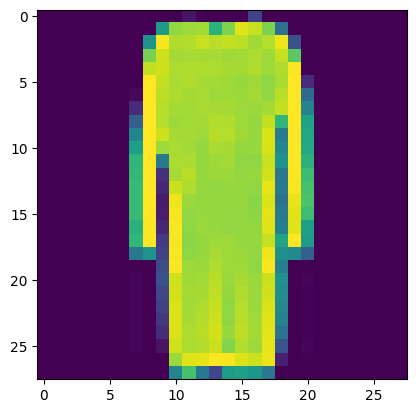

In [4]:
# Visualización de una muestra
import numpy as np
import matplotlib.pyplot as plt
# se puede poner un valor entre 0 y 59999
index = 25
# Imprime la etiqueta y laimagen
np.set_printoptions(linewidth=320)
print(f'label: {train_labels[index]}')
print(f'image: \n {train_images[index]}')
# Visualiza la imagen
plt.imshow(train_images[index])

In [5]:
# Normalizar los valores de píxeles y probar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:

df_train_images = pd.DataFrame(train_images.reshape(train_images.shape[0], -1))
df_test_images = pd.DataFrame(test_images.reshape(test_images.shape[0], -1))

df_train_labels = pd.DataFrame(train_labels, columns=['label'])
df_test_labels = pd.DataFrame(test_labels, columns=['label'])

df_train = pd.concat([df_train_images, df_train_labels], axis=1)
df_test = pd.concat([df_test_images, df_test_labels], axis=1)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
# Construir el modelo de clasificación
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4778 - accuracy: 0.8262 - val_loss: 0.4392 - val_accuracy: 0.8321
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3631 - accuracy: 0.8672 - val_loss: 0.3909 - val_accuracy: 0.8551
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3241 - accuracy: 0.8806 - val_loss: 0.3557 - val_accuracy: 0.8672
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3029 - accuracy: 0.8875 - val_loss: 0.3404 - val_accuracy: 0.8755
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2859 - accuracy: 0.8937 - val_loss: 0.3363 - val_accuracy: 0.8796
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2685 - accuracy: 0.8997 - val_loss: 0.3532 - val_accuracy: 0.8779
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2580 - accuracy: 0.9027 - val_loss: 0.3439 - val

<Axes: >

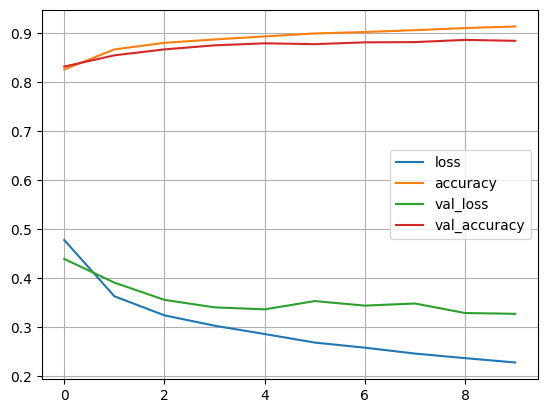

In [10]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [11]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(train_images, train_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2157 - accuracy: 0.9177
loss: 0.2157217562198639
accuracy: 0.9176666736602783


In [12]:
# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3272 - accuracy: 0.8847
loss: 0.32723182439804077
accuracy: 0.8847000002861023


In [14]:
# Predicción de una muestra
index = 25
print(f'label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'classification: \n {classification.reshape(-1,1)}')
#4 abrigo

label: 4
1/1 [==============================] - 0s 83ms/step
classification: 
 [[2.1811598e-03]
 [2.0020305e-05]
 [7.7619386e-01]
 [6.8115885e-05]
 [1.1058340e-01]
 [8.6130267e-09]
 [1.1091399e-01]
 [1.6866384e-08]
 [3.9346844e-05]
 [6.9791367e-10]]
